<a href="https://colab.research.google.com/github/Piroon1123/choikeonwoo/blob/main/AI_06_%EC%B5%9C%EA%B1%B4%EC%9A%B0_Section01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CodeStates_Project 1

### AI_06_최건우



# 0.  표 불러오기

In [ ]:
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2.csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [ ]:
# 1. 표 불러오기

import pandas as pd

df = pd.read_csv('vgames2.csv')
df = df.drop([df.columns[0]],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 2. 표 다듬기 (1) - 변환 함수 설정
# 조사 결과, 기본 판매단위가 1,000,000개 임을 확인하였음.

def tofloat(x):
  if 'K' in x :
    x = float(x.replace('K',''))
    x = int(x * 1000)
  elif 'M' in x:
    x = float(x.replace('M',''))
    x = int(x * 1000000)
  else :
    x = float(x)
    x = int(x * 1000000)
  
  return x

In [ ]:
# 3. 표 다듬기 (2) - 변환 함수 적용

df['NA_Sales'] = df['NA_Sales'].apply(tofloat)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat)

# I.  지역별 선호장르

## 1. North-America Market (북아메리카)

In [ ]:
# 1-1. 북미시장 매출 순위 Top 100

df1 = df.sort_values('NA_Sales', ascending=False)
df1 = df1.reset_index()
df1 = df1.drop([df1.columns[0]],axis=1)
df1 = df1.head(100)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000
2,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000,630000,280000,470000
3,Tetris,GB,1989.0,Puzzle,Nintendo,23200000,2260000,4220000,580000
4,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000
...,...,...,...,...,...,...,...,...,...
95,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3800000,5810000,360000,2020000
96,Frogger,PS,1997.0,Action,Hasbro Interactive,3790000,270000,0,110000
97,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3780000,2170000,1310000,310000
98,The Legend of Zelda,NES,1986.0,Action,Nintendo,3740000,930000,1690000,140000


In [ ]:
# 1-2.  북미시장 Top 100 장르 추리기

df1['Genre'].value_counts()

Shooter         27
Platform        17
Action          14
Misc            10
Role-Playing     9
Sports           8
Racing           8
Fighting         2
Puzzle           2
Adventure        1
Simulation       1
Name: Genre, dtype: int64

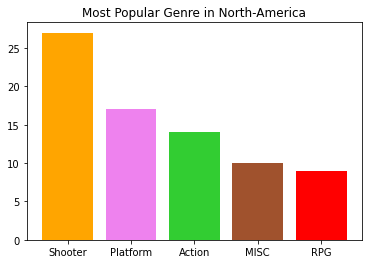

In [ ]:
# 1-3.  북미시장 도식화

import seaborn as sns
import matplotlib.pyplot as plt

xx = ['Shooter', 'Platform', 'Action', 'MISC', 'RPG']
yy = [27,17,14,10,9]
colors = ['orange', 'violet', 'limegreen', 'sienna' ,'red']

plt.bar(xx, yy, color = colors)
plt.title('Most Popular Genre in North-America')
plt.show()
plt.rc('font', size=15)

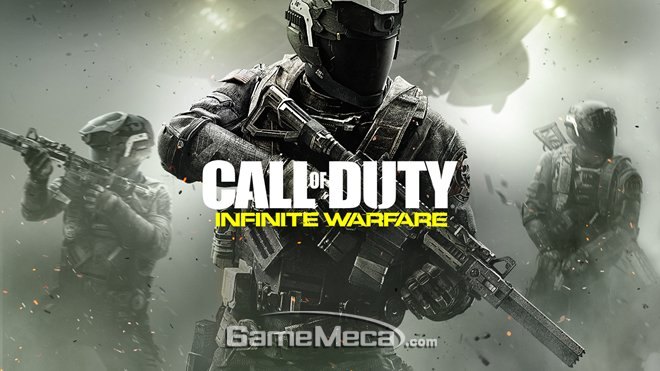

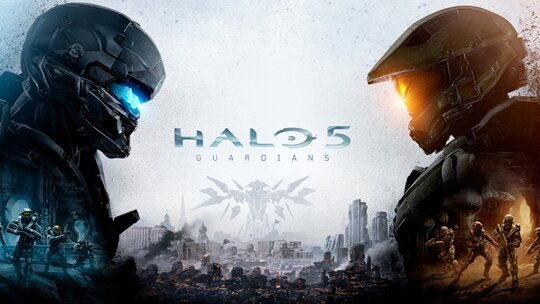

### [북미시장 분석]

(1). Tier : 슈팅 - 플랫폼 - 액션 - MISC - 롤플레잉


(2). Fact

- 콜오브듀티, 헤일로 시리즈 등 FPS 장르가 가장 큰 인기

- 높은 그래픽 사양을 기반으로 한 사실적이고 극적인 시각효과


(3). Opinion

- 인기가 높은 게임들은 대부분 시리즈물, 영화 및 애니메이션 등 예전부터 이어져 내려온 친숙한 캐릭터와 이를 기반으로 한 탄탄한 스토리라인을 갖춘 게임이 인기가 있음


- 대표적인 슈팅게임인 콜오브듀티, 헤일로 역시 전통이 있는 시리즈이나, 스토리라인보다는 높은 시각효과와 사실적 묘사를 통해 인기를 얻으므로, 뛰어난 그래픽의 새로운 게임이 등장한다면 얼마든지 인기를 끌 수 있음.


- 단, 그래픽 사양이 높은 만큼 개발비가 높아짐, 국내외 대형 게임사들과의 개발 경쟁이 가능할지 미지수


## 2. Europe Market (유럽)

In [ ]:
# 2-1. 유럽시장 매출 순위 Top 100

df2 = df.sort_values('EU_Sales', ascending=False)
df2 = df2.reset_index()
df2 = df2.drop([df2.columns[0]],axis=1)
df2 = df2.head(100)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000
3,Nintendogs,DS,2005.0,Simulation,Nintendo,9070000,11000000,1930000,2750000
4,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000,9270000,970000,4139999
...,...,...,...,...,...,...,...,...,...
95,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1970000,2510000,0,940000
96,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,580000,2480000,40000,590000
97,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,1640000,2480000,440000,580000
98,FIFA Soccer 07,PS2,2006.0,Sports,Electronic Arts,710000,2480000,30000,890000


In [ ]:
# 2-2. 유럽시장 Top 100 장르 추리기

import seaborn as sns
import matplotlib.pyplot as plt

df2['Genre'].value_counts()

Sports          19
Shooter         16
Action          15
Role-Playing    12
Platform        11
Misc             9
Racing           9
Simulation       3
Puzzle           2
Adventure        1
Fighting         1
Name: Genre, dtype: int64

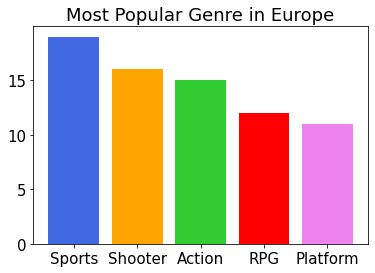

In [ ]:
# 2-3. 유럽시장 도식화

xx = ['Sports','Shooter', 'Action', 'RPG', 'Platform']
yy = [19,16,15,12,11]
colors = ['royalblue', 'orange', 'limegreen', 'red', 'violet']

plt.bar(xx, yy, color = colors)
plt.title('Most Popular Genre in Europe')
plt.show()
plt.rc('font', size=15)

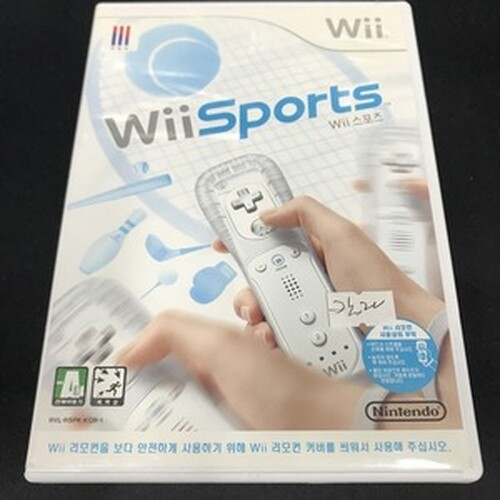

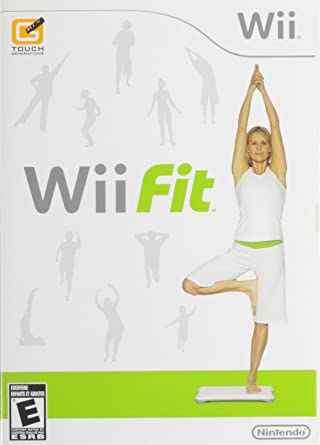

### [유럽시장 분석]

(1). Tier : 스포츠 - 슈팅 - 액션 - 롤플레잉 - 플랫폼

(2). Fact

전 세계적인 인기를 누린 위 스포츠와 더불어, 피파 등의 스포츠게임이 가장 강세

이후 순위는 북미 시장과 비슷한 양상을 보임

(3). Opinion

스포츠게임에 가장 큰 관심을 가진 곳, 특히 리모콘을 통하여 소비자가 가상으로 원하는 스포츠를 경험할 수 있는 [위 스포츠 시리즈]가 큰 인기를 얻음.

유럽 시장을 공략하기 위해서는 스포츠 관련 컨텐츠를 노리는 것이 유효할 것으로 예상, 좋은 반응을 얻기 위해서는 단순 콘솔이 아닌 직접 체험이 가능한 게임을 만드는 것이 중요할 것으로 보임.

## 3. Japan Market (일본)

In [ ]:
# 3-1.  일본시장 매출 순위 Top 100

df3 = df.sort_values('JP_Sales', ascending=False)
df3 = df3.reset_index()
df3 = df3.drop([df3.columns[0]],axis=1)
df3 = df3.head(100)
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000
1,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9000000,6180000,7200000,710000
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000
4,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6420000,4520000,6040000,1370000
...,...,...,...,...,...,...,...,...,...
95,Super Mario World 2: Yoshi's Island,SNES,1995.0,Platform,Nintendo,1650000,610000,1760000,90000
96,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996.0,Platform,Nintendo,1170000,500000,1750000,80000
97,Monster Hunter Freedom 2,PSP,2007.0,Role-Playing,Capcom,370000,270000,1750000,180000
98,Kanshuu Nippon Joushikiryoku Kentei Kyoukai: I...,DS,2006.0,Misc,Nintendo,0,0,1710000,0


In [ ]:
# 3-2.  일본시장 Top 100 장르 추리기
df3['Genre'].value_counts()

Role-Playing    38
Platform        16
Sports          10
Misc             8
Racing           7
Fighting         5
Simulation       4
Puzzle           4
Action           4
Adventure        1
Name: Genre, dtype: int64

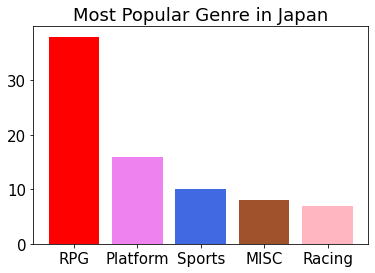

In [ ]:
# 3-3.  일본시장 도식화

import seaborn as sns
import matplotlib.pyplot as plt

xx = ['RPG', 'Platform', 'Sports' ,'MISC', 'Racing']
yy = [38,16,10,8,7]
colors = ['red','violet','royalblue','sienna', 'lightpink']

plt.bar(xx, yy, color = colors)
plt.title('Most Popular Genre in Japan')
plt.show()
plt.rc('font', size=15)

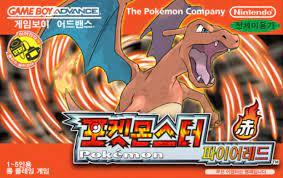

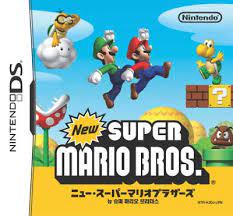

### [일본시장 분석]

(1). Tier : 롤플레잉 - 플랫폼 - 스포츠 - MISC - 레이싱

(2). Fact

포켓몬 시리즈를 주축으로 한 롤플레잉 게임의 강세가 두드러짐

FPS 장르의 슈팅게임에 대해서 북미, 유럽시장과 달리 큰 호응을 얻지 못했고, 아기자기한 캐릭터를 기반으로 한 캐쥬얼, 육성형 게임의 인기가 높음

(3). Opinion

일본 시장의 특징은 포켓몬 시리즈, 마리오 시리즈 등, 옛날부터 독자적인 세계관과 탄탄한 스토리라인을 구축한 게임이 지금까지 큰 인기를 얻고 있음

반면, 높은 그래픽의 극사실주의적인 게임은 타 시장보다 큰 호응을 얻지 못하고 캐쥬얼한 캐릭터가 인기, 하지만 캐릭터에도 스토리와 유명세가 있어야 호응을 얻을 수 있음. 

일본시장을 공략하기 위해서는 장기적인 관점에서 봐야함, 캐릭터가 친숙하면서도 지속적으로 시리즈를 창출할 수 있는 스토리라인을 갖춰야 경쟁력을 가질 수 있음.

### [총평]

- 미국은 FPS
- 유럽은 Sports
- 일본은 RPG

## II. 연도별 게임 트렌드

In [ ]:
# 1. 연도별 정리 (결측값 제거)

df4 = df.sort_values('Year', ascending=False)
df4 = df4.dropna(axis=0)
df4 = df4[(df4.Year >= 1960) & (df4.Year < 2017)]
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13028,XCOM 2,PS4,2016.0,Strategy,Take-Two Interactive,10000,20000,0,10000
11763,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1200000,620000,0,180000
13912,Ys VIII: Lacrimosa of Dana,PSV,2016.0,Role-Playing,Nihon Falcom Corporation,0,0,90000,0
10113,UEFA Euro 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0,210000,30000,30000
8767,Battleborn,XOne,2016.0,Shooter,Take-Two Interactive,80000,40000,0,10000
...,...,...,...,...,...,...,...,...,...
10121,Defender,2600,1980.0,Misc,Atari,990000,50000,0,10000
9226,Bridge,2600,1980.0,Misc,Activision,250000,20000,0,0
13133,Freeway,2600,1980.0,Action,Activision,320000,20000,0,0
5723,Asteroids,2600,1980.0,Shooter,Atari,4000000,260000,0,50000


In [ ]:
# 2. 장르별 정리

spo = df4['Genre'] == 'Sports'
sho = df4['Genre'] == 'Shooter'
act = df4['Genre'] == 'Action'
rpg = df4['Genre'] == 'Role-Playing'
pfm = df4['Genre'] == 'Platform'
mis = df4['Genre'] == 'Misc'
rcg = df4['Genre'] == 'Racing'

sport = df4[spo]
shoot = df4[sho]
acttt = df4[act]
rpggg = df4[rpg]
pfmmm = df4[pfm]
misss = df4[mis]
rcggg = df4[rcg]

In [ ]:
# 3. 연도별 개수지정

sport['Sports'] = 1
shoot['Shooter'] = 1
acttt['Action'] = 1
rpggg['RPG'] = 1
pfmmm['PFM'] = 1
misss['MISC'] = 1
rcggg['RACE'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# 4. 장르, 연도별 출시 수량의 합

aa = sport.groupby(sport['Year']).sum()
bb = shoot.groupby(shoot['Year']).sum()
cc = acttt.groupby(acttt['Year']).sum()
dd = rpggg.groupby(rpggg['Year']).sum()
ee = pfmmm.groupby(pfmmm['Year']).sum()
ff = misss.groupby(misss['Year']).sum()
gg = rcggg.groupby(rcggg['Year']).sum()

alcount = pd.concat([aa['Sports'],bb['Shooter'],cc['Action'],dd['RPG'],ee['PFM'],ff['MISC'],gg['RACE']],axis=1)
alcount = alcount.fillna(0)

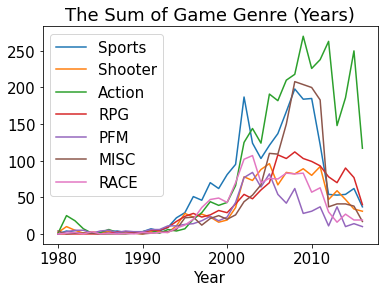

In [ ]:
# 5. 도식화

import matplotlib.pyplot as plt 

alcount.plot()
plt.title('The Sum of Game Genre (Years)')
plt.rc('font', size=15)

### [연도별 게임 트렌드 분석]

[Fact]

1. 1990년 대 이후 비디오 게임 시장은 꾸준히 성장,
   2000년 대 이후, 게임 출시수 비약적인 증가

2. 2000년대 중반 ~ 2010년대 초반에 Action, Sports, MISC 출시 급증

3. 2010년대 이후 비디오 게임시장 하락세


[Opinion]

1. Nintendo, Sony 등 대형 게임사의 게임기가 세계적인 인기를 끌면서 시장이 점점 커졌다.

2. 다양한 게임 플랫폼이 출시되면서 여러 신규게임이 출시 되었다. 특히, 모션인식 기술이 접목된 닌텐도 Wii가 큰 인기를 끌었다. 2006년 출시한 닌텐도 Wii Sports는 북미, 유럽시장에서 큰 인기를 얻었다.

3. 2010년 이후, 리그오브레전드, 오버워치, 배틀그라운드 등의 온라인게임이 세계적으로 큰 히트를 쳤고, e-sports 대회의 흥행으로 더 커진 온라인게임 시장으로 인해 비디오 게임 시장은 점점 축소되어 가고 있다.

### [총평]

Action 게임의 출시가 꾸준히 많음
-> 주류 게임이 없음, 액션게임 내에서도 분야가 다양하기 때문에, 진입장벽이 그나마 수월하다고 할 수 있음

Sports -> FIFA(축구), MBA(농구), MLB THE SHOW(야구), Wii Switch(모션인식) 등 종목별로 강력한 시리즈가 있음

Shooter -> Call of Duty, Halo 등이 강세 초고사양 게임의 인기가 높아지면서 개발비가 점점 높아짐, 진입장벽 높아짐

RPG -> 포켓몬 시리즈가 초강세, 그 외 파이널판타지, 몬스터헌터 등 전통이 있는 시리즈가 꾸준한 인기를 얻고 있음

MISC -> 닌텐도 Switch라는 절대 강자가 있음

Race -> 종목의 컨텐츠의 한계가 있음, 캐릭터에 따라 인기가 좌우됨.

# III. 출고량 높은 게임 분석 & 시각화

In [ ]:
# 1. 출고량 Top 50  (1990년 이후)

df['All_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df = df.sort_values('All_Sales', ascending=False)
df = df[df.Year>1990]
dfx = df.head(10)
dfx = dfx.reset_index()
dfx

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
2,3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
3,7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
4,6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
5,3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
6,16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
7,11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9070000,11000000,1930000,2750000,24750000
8,10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000
9,9416,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9000000,6180000,7200000,710000,23090000


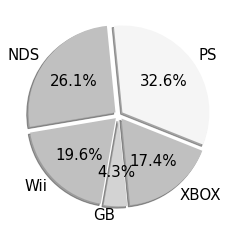

In [ ]:
# Top 50 게임 플랫폼 비율

import matplotlib.pyplot as plt

ratio = [9,12,15,8,2]
labels = ['Wii', 'NDS', 'PS', 'XBOX', 'GB']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['silver','silver' ,'whitesmoke', 'silver', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

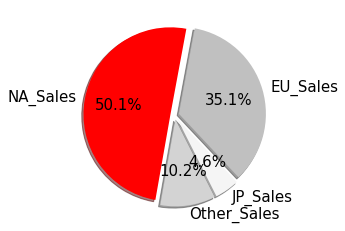

In [ ]:
# 출고량 1위 - Wii Sports -

import matplotlib.pyplot as plt

ratio = [4149, 2902, 377, 846]
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['red', 'silver', 'whitesmoke', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

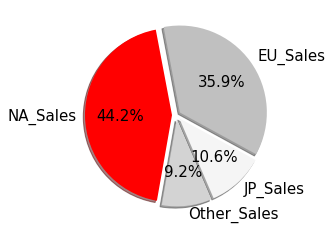

In [ ]:
# 출고량 2위 - Mario Kart -

import matplotlib.pyplot as plt

ratio = [15850000, 12880000, 3790000, 3310000]
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['red', 'silver', 'whitesmoke', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

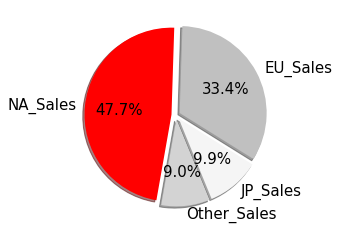

In [ ]:
# 출고량 3위 - Wii Sports Resort -

import matplotlib.pyplot as plt

ratio = [15750000,11010000,3280000,2960000]
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['red', 'silver', 'whitesmoke', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 결론

### 1. 북미 고객의 취향을 노려야 한다.

### 2. 북미 고객이 가장 선호하는 장르는 슈팅게임이다.

### 3. 따라서 슈팅(FPS) 게임을 개발하는 것이 가장 효율적이다.